In [ ]:
from PIL import Image

def resize_with_center_crop(image_path, target_size):
    image = Image.open(image_path)
    old_size = image.size
    ratio = max(old_size) / float(target_size)
    new_size = tuple([int(x / ratio) for x in old_size])
    image = image.resize(new_size, Image.ANTIALIAS)
    left = (new_size[0] - target_size) / 2
    top = (new_size[1] - target_size) / 2
    right = (new_size[0] + target_size) / 2
    bottom = (new_size[1] + target_size) / 2
    cropped_image = image.crop((left, top, right, bottom))
    return cropped_image

# Example usage
image_path = 'C:/test001/ttt/cnn_classifier/images/air.jpg'
target_size = 28  # Specify the target size as a single integer for square cropping
cropped_image = resize_with_center_crop(image_path, target_size)

# Display the cropped image (optional)
cropped_image.show()


In [1]:
from PIL import Image, ImageOps
import numpy as np

def resize_with_padding(image_path, target_size):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = ImageOps.invert(image)  # Invert colors if needed
    old_size = image.size
    ratio = float(target_size) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])
    image = image.resize(new_size, Image.LANCZOS)

    new_image = Image.new("L", (target_size, target_size), 0)  # Create new image with black padding
    new_image.paste(image, ((target_size - new_size[0]) // 2, (target_size - new_size[1]) // 2))
    
    return new_image

# Example usage
image_path = 'C:/test001/ttt/cnn_classifier/iamges/air.jpg'
target_size = 28  # Specify the target size as a single integer for square cropping
padded_image = resize_with_padding(image_path, target_size)

# Convert to NumPy array and ensure shape is (28, 28, 1)
image_array1 = np.array(padded_image)
image_array1 = np.expand_dims(image_array1, axis=-1)

print(np.shape(image_array1))  # Should output (28, 28, 1)
padded_image.show()

(28, 28, 1)


In [ ]:
from PIL import Image, ImageOps

def resize_with_padding1(image_path, target_size):
    image = Image.open(image_path).convert('L')
    image = ImageOps.invert(image)
    old_size = image.size
    ratio = float(target_size) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])
    image = image.resize(new_size, Image.LANCZOS)

    new_image = Image.new("RGB", (target_size, target_size), (0, 0, 0))
    new_image.paste(image, ((target_size - new_size[0]) // 2, (target_size - new_size[1]) // 2))
    return new_image

# Example usage
image_path = 'C:/test001/ttt/cnn_classifier/iamges/air.jpg'
target_size = 28  # Specify the target size as a single integer for square cropping
padded_image = resize_with_padding1(image_path, target_size)

np.shape(padded_image)
# Display the padded image (optional)
padded_image.show()


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

# Set the path to the chromedriver executable
chromedriver_path = 'C:/Users/Mind/Downloads/driver/chromedriver-win64/chromedriver'

# Create a new instance of the Chrome driver
driver = webdriver.Chrome(executable_path=chromedriver_path)

# Go to a website
driver.get("http://www.google.com")

# Find the search box
search_box = driver.find_element(By.NAME, "q")

# Type a search query
search_box.send_keys("OpenAI")

# Press Enter
search_box.send_keys(Keys.RETURN)

# Wait for the results to load and display the title
driver.implicitly_wait(5)  # seconds
print(driver.title)

# Close the browser
driver.quit()


TypeError: WebDriver.__init__() got an unexpected keyword argument 'executable_path'

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# List of file paths for the 10 classes
file_paths = [
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_basketball.npy',
    'C:/demo/classfier_cnn/data/full_numpy_bitmap_airplane.npy'
]

# Function to load and preprocess data
def load_data(file_paths, num_samples=5000):
    data = []
    labels = []
    for idx, file_path in enumerate(file_paths):
        array_data = np.load(file_path)
        # Get the first num_samples samples
        first_samples = array_data[:num_samples]
        data.append(first_samples)
        # Create labels for these samples
        labels.append(np.full((num_samples,), idx))
    return np.vstack(data), np.concatenate(labels)

# Load the data
data, labels = load_data(file_paths)

# Normalize the data
data = data.astype('float32') / 255.0

# Reshape the data if necessary (e.g., if the images are 28x28 pixels)
data = data.reshape(-1, 1,28, 28)  # Assuming the images are 28x28 pixels and grayscale

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (8000, 1, 28, 28)
X_test shape: (2000, 1, 28, 28)
y_train shape: (8000,)
y_test shape: (2000,)


In [19]:
class_labels = [
    'full_numpy_bitmap_basketball',
    'full_numpy_bitmap_airplane'
]

# Create the dictionary
class_dict = {i: label for i, label in enumerate(class_labels)}

# Print the dictionary
print(class_dict)

{0: 'full_numpy_bitmap_basketball', 1: 'full_numpy_bitmap_airplane'}


In [20]:
X_test_reshaped = np.reshape(X_test, (2000, 1, 28, 28))
X_train_reshaped = np.reshape(X_train, (8000, 1, 28, 28))

# Print the shape after reshaping
print("X_train shape after reshaping:", X_train_reshaped.shape)
print("X_test shape after reshaping:", X_test_reshaped.shape)

X_train shape after reshaping: torch.Size([8000, 1, 28, 28])
X_test shape after reshaping: torch.Size([2000, 1, 28, 28])


In [21]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Assume X_train, y_train, X_test, y_test are already defined as numpy arrays or tensors

# Convert data to tensors if they are numpy arrays
if isinstance(X_train_reshaped, np.ndarray):
    X_train = torch.tensor(X_train, dtype=torch.float32) #dtype=torch.float32
if isinstance(y_train, np.ndarray):
    y_train = torch.tensor(y_train, dtype=torch.int64)
if isinstance(X_test_reshaped, np.ndarray):
    X_test = torch.tensor(X_test, dtype=torch.float32)
if isinstance(y_test, np.ndarray):
    y_test = torch.tensor(y_test, dtype=torch.int64)

# Combine data and labels into TensorDataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_dataset, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)


In [22]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000235BA889DF0>, <torch.utils.data.dataloader.DataLoader object at 0x000002347FCA9400>)
Length of train dataloader: 250 batches of 32
Length of test dataloader: 63 batches of 32


In [23]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import numpy as np

class DoodleClassModel04(nn.Module):
    def __init__(self, input_channels: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),

            nn.Flatten(),
            nn.Linear(in_features=128*3*3, out_features=256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.4),
            nn.Linear(in_features=256, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

# Define accuracy function
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    return (correct / len(y_true)) * 100

torch.manual_seed(42)

# Check if GPU is available and use it
device = "cpu" #torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
model_2 = DoodleClassModel04(input_channels=1, output_shape=len(class_dict)) # For grayscale images
model_2.to(device)

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model_2.parameters(), lr=0.001, weight_decay=1e-5)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, verbose=True)

# Data loading (assuming train_dataloader and test_dataloader are defined)
epochs = 30

# Training loop
for epoch in tqdm(range(epochs)):
    model_2.train()
    train_loss = 0
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        y_pred = model_2(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    
    train_loss /= len(train_dataloader)
    
    # Evaluation
    model_2.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            test_pred = model_2(X)
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
    
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    scheduler.step(test_loss)  # Update the scheduler

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

print("Training Complete")


c:\test001\ttt\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
  3%|▎         | 1/30 [00:03<01:36,  3.32s/it]

Epoch 1/30 | Train Loss: 0.1569 | Test Loss: 0.1479 | Test Acc: 97.42%


  7%|▋         | 2/30 [00:06<01:27,  3.14s/it]

Epoch 2/30 | Train Loss: 0.0902 | Test Loss: 0.0489 | Test Acc: 98.46%


 10%|█         | 3/30 [00:09<01:23,  3.10s/it]

Epoch 3/30 | Train Loss: 0.0724 | Test Loss: 0.0527 | Test Acc: 98.36%


 13%|█▎        | 4/30 [00:12<01:20,  3.09s/it]

Epoch 4/30 | Train Loss: 0.0647 | Test Loss: 0.0419 | Test Acc: 98.91%


 17%|█▋        | 5/30 [00:15<01:17,  3.09s/it]

Epoch 5/30 | Train Loss: 0.0678 | Test Loss: 0.0387 | Test Acc: 98.96%


 20%|██        | 6/30 [00:18<01:14,  3.11s/it]

Epoch 6/30 | Train Loss: 0.0563 | Test Loss: 0.0389 | Test Acc: 98.91%


 23%|██▎       | 7/30 [00:21<01:11,  3.09s/it]

Epoch 7/30 | Train Loss: 0.0494 | Test Loss: 0.0446 | Test Acc: 98.71%


 27%|██▋       | 8/30 [00:24<01:08,  3.09s/it]

Epoch 8/30 | Train Loss: 0.0474 | Test Loss: 0.0500 | Test Acc: 98.81%


 30%|███       | 9/30 [00:27<01:05,  3.11s/it]

Epoch 9/30 | Train Loss: 0.0445 | Test Loss: 0.0699 | Test Acc: 98.31%


 33%|███▎      | 10/30 [00:31<01:01,  3.09s/it]

Epoch 10/30 | Train Loss: 0.0425 | Test Loss: 0.2963 | Test Acc: 98.71%


 37%|███▋      | 11/30 [00:34<00:58,  3.08s/it]

Epoch 11/30 | Train Loss: 0.0395 | Test Loss: 0.0993 | Test Acc: 98.96%


 40%|████      | 12/30 [00:37<00:55,  3.07s/it]

Epoch 12/30 | Train Loss: 0.0410 | Test Loss: 0.1093 | Test Acc: 98.86%


 43%|████▎     | 13/30 [00:40<00:52,  3.07s/it]

Epoch 13/30 | Train Loss: 0.0358 | Test Loss: 0.0407 | Test Acc: 98.81%


 47%|████▋     | 14/30 [00:43<00:49,  3.07s/it]

Epoch 14/30 | Train Loss: 0.0339 | Test Loss: 0.0952 | Test Acc: 98.81%


 50%|█████     | 15/30 [00:46<00:45,  3.06s/it]

Epoch 15/30 | Train Loss: 0.0344 | Test Loss: 0.0857 | Test Acc: 98.81%


 53%|█████▎    | 16/30 [00:49<00:43,  3.10s/it]

Epoch 16/30 | Train Loss: 0.0305 | Test Loss: 0.0526 | Test Acc: 98.76%


 57%|█████▋    | 17/30 [00:52<00:40,  3.09s/it]

Epoch 17/30 | Train Loss: 0.0311 | Test Loss: 0.1533 | Test Acc: 98.71%


 60%|██████    | 18/30 [00:55<00:37,  3.09s/it]

Epoch 18/30 | Train Loss: 0.0297 | Test Loss: 0.0367 | Test Acc: 98.76%


 63%|██████▎   | 19/30 [00:58<00:34,  3.09s/it]

Epoch 19/30 | Train Loss: 0.0263 | Test Loss: 0.1136 | Test Acc: 98.76%


 67%|██████▋   | 20/30 [01:01<00:30,  3.09s/it]

Epoch 20/30 | Train Loss: 0.0329 | Test Loss: 0.0720 | Test Acc: 98.81%


 70%|███████   | 21/30 [01:04<00:27,  3.09s/it]

Epoch 21/30 | Train Loss: 0.0292 | Test Loss: 0.0383 | Test Acc: 98.76%


 73%|███████▎  | 22/30 [01:07<00:24,  3.07s/it]

Epoch 22/30 | Train Loss: 0.0304 | Test Loss: 0.0739 | Test Acc: 98.81%


 77%|███████▋  | 23/30 [01:11<00:21,  3.07s/it]

Epoch 23/30 | Train Loss: 0.0257 | Test Loss: 0.0580 | Test Acc: 98.76%


 80%|████████  | 24/30 [01:14<00:18,  3.08s/it]

Epoch 24/30 | Train Loss: 0.0294 | Test Loss: 0.3690 | Test Acc: 98.56%


 83%|████████▎ | 25/30 [01:17<00:15,  3.07s/it]

Epoch 25/30 | Train Loss: 0.0272 | Test Loss: 0.0571 | Test Acc: 98.81%


 87%|████████▋ | 26/30 [01:20<00:12,  3.08s/it]

Epoch 26/30 | Train Loss: 0.0332 | Test Loss: 0.0615 | Test Acc: 98.76%


 90%|█████████ | 27/30 [01:23<00:09,  3.08s/it]

Epoch 27/30 | Train Loss: 0.0264 | Test Loss: 0.3400 | Test Acc: 98.76%


 93%|█████████▎| 28/30 [01:26<00:06,  3.08s/it]

Epoch 28/30 | Train Loss: 0.0283 | Test Loss: 0.0645 | Test Acc: 98.81%


 97%|█████████▋| 29/30 [01:29<00:03,  3.09s/it]

Epoch 29/30 | Train Loss: 0.0314 | Test Loss: 0.0858 | Test Acc: 98.86%


100%|██████████| 30/30 [01:32<00:00,  3.09s/it]

Epoch 30/30 | Train Loss: 0.0278 | Test Loss: 0.0757 | Test Acc: 98.81%
Training Complete


In [25]:
device

'cpu'

In [26]:
import torch
import numpy as np

def preprocess_sample_image(image_array):
    # Normalize the image
    image_array = image_array.astype('float32') / 255.0
    
    # Reshape the image to (1, 1, 28, 28) if it's a single image
    image_array = np.reshape(image_array, (1, 1, 28, 28))
    
    # Convert to torch tensor
    image_tensor = torch.tensor(image_array, dtype=torch.float32)
    
    # Check if CUDA (GPU) is available and move tensor to CUDA device
    if torch.cuda.is_available():
        device = 'cpu'#torch.device("cuda")
        image_tensor = image_tensor.to(device)
    
    return image_tensor


(678, 834)
(28, 28, 1)


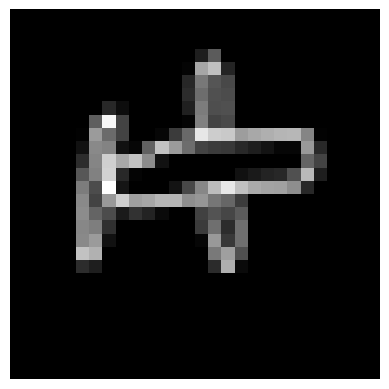

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import Image, ImageOps

# Load the image
image = Image.open('C:/test001/ttt/cnn_classifier/iamges/air.jpg').convert('L')  # Convert to grayscale

# Invert the colors
image = ImageOps.invert(image)
print(np.shape(image))
# Resize the image to 28x28
resized_image = image.resize((28, 28))

# Convert the image to a NumPy array
image_array = np.array(resized_image)

# Ensure the image has the shape (28, 28, 1)
image_array = np.expand_dims(image_array, axis=-1)

print(np.shape(image_array))  # Should output (28, 28, 1)
plt.imshow(image_array.squeeze(), cmap='gray')
plt.axis('off')  # Optional: to hide the axis
plt.show()


In [32]:
# Preprocess the sample image
sample_image_tensor = preprocess_sample_image(image_array)#(input_tensor)

# Make a prediction with the loaded model
with torch.no_grad():
    output = model_2(sample_image_tensor)
    predicted_class = torch.argmax(output, dim=1).item()

# Print the predicted class

print(f"Predicted class label: {class_dict[predicted_class]}")
print(f"Predicted class index: {predicted_class}")

Predicted class label: full_numpy_bitmap_airplane
Predicted class index: 1


In [33]:
sample_image_tensor.dtype

torch.float32

In [34]:
torch.save(model_2.state_dict(), './models/cnn_noncuda_model.pth')